In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
import numexpr


In [2]:
data = pd.read_excel(r'D:\Python27\ETCSalesData.xlsx')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [4]:
data.head()
# print(data.describe())

,CycleStartDateKey,CycleStartDate,CycleStartYear,CycleStartQuarter,CycleStartYearQuarter,CycleStartYearMonth,CycleStartYearMonthName,CycleStartMonthName,CycleStartMonthNameLong,CycleStartYearWeek,...,FeesNotInvoiced,FeesPaid,FeesUnpaid,FeesWrittenOff,LeadScore,LeadGrade,YearCycleSequece,LeadsEngaged,LeadsQualified,LeadsPromoted
0,20170615,2017-06-15,2017,Q2,2017 Q2,201706,2017 Jun,Jun,June,2017-W24,...,0,0,0,0,100,A,1,1,1,1
1,20170711,2017-07-11,2017,Q3,2017 Q3,201707,2017 Jul,Jul,July,2017-W28,...,0,0,0,0,65,B,1,1,0,0
2,20180705,2018-07-05,2018,Q3,2018 Q3,201807,2018 Jul,Jul,July,2018-W27,...,0,1,0,0,100,A,1,1,1,1
3,20170203,2017-02-03,2017,Q1,2017 Q1,201702,2017 Feb,Feb,February,2017-W05,...,0,0,0,0,100,A,1,1,1,1
4,20180425,2018-04-25,2018,Q2,2018 Q2,201804,2018 Apr,Apr,April,2018-W17,...,0,0,0,0,65,B,1,1,1,0


<p> <h1> Percentage of Accounts Opened / Not Opened </h1></p>

In [5]:
print("Total number of Accounts", data.shape)
# print(data.describe())

print('*='*50)

data_iswon_1 = data[data['isWon']==1]
data_iswon_0 = data[data['isWon']==0]
print(data_iswon_1.shape)
print(data_iswon_0.shape)

print('*='*50)

print("Percentage of accounts opened successfully:", (len(data_iswon_1['isWon'])/data['isWon'].shape[0])*100)
print("Percentage of accounts not opened successfully:", (len(data_iswon_0['isWon'])/data['isWon'].shape[0])*100)

Total number of Accounts (106210, 48)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
(13986, 48)
(92224, 48)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Percentage of accounts opened successfully: 13.168251577064307
Percentage of accounts not opened successfully: 86.83174842293569


In [6]:
print(data_iswon_1['isWon'].value_counts())
print(data['isWon'].shape[0])

1    13986
Name: isWon, dtype: int64
106210


<p> <b> Lead Source Group: "Opened Accounts" </B> <br> Number of customers who opened their accounts (Qualified Leads) through different <B>Source Groups </b>

Digital Leads              3664
Sales Lead                 3502
Inbound Call               1850
House Account              1385
Events                      951
Specialty                   847
Event                       828
Webinars                    379
Service to Sales            328
NONE                        190
New Marketing Campaigns      62
Name: LeadSourceGroup, dtype: int64


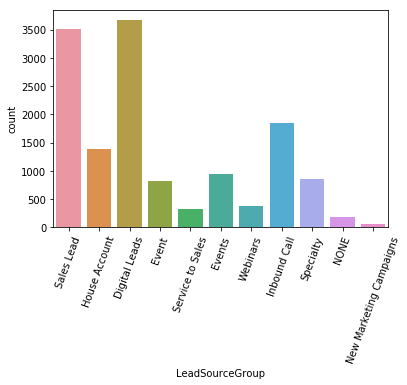

In [7]:
g1 = sns.countplot(data_iswon_1['LeadSourceGroup'])
for item in g1.get_xticklabels():
    item.set_rotation(70)
print(data_iswon_1.LeadSourceGroup.value_counts())

<p> <b> Lead Source Group: "Did not Opened their accounts"</B> <br>Number of customers who did not opened their accounts (Unqualified Leads)

Digital Leads              48929
Events                     12727
Specialty                  11751
Webinars                    5708
Inbound Call                4592
Sales Lead                  3820
New Marketing Campaigns     1822
House Account               1608
Service to Sales            1048
NONE                         219
Name: LeadSourceGroup, dtype: int64


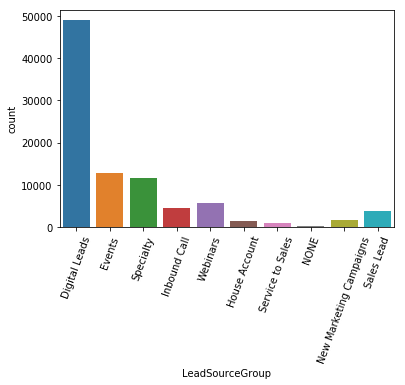

In [8]:
g2= sns.countplot(data_iswon_0['LeadSourceGroup'])
for item in g2.get_xticklabels():
    item.set_rotation(70)

print(data_iswon_0.LeadSourceGroup.value_counts())

In [9]:
# g2_1= sns.countplot(data_iswon_0[data_iswon_0.LeadSourceGroup=='Digital Leads'].LeadSourceType)
# for item in g2_1.get_xticklabels():
#     item.set_rotation(70)

In [10]:
# f = np.unique(data_iswon_0.LeadSourceGroup)
# for i in f:
#     print(i)

<p> <h1> Question 6 </H1></p><br>
<b> Objective: </b>How accurate are <b>lead grades</b> given to leads in determining likelihood of an account open? <br>

<h3> Solution </h3><br>
<p> Here objective is to determine how accurate the lead grades were assigned to the leads for opening an account..<br>
    1. I am using the column <b>"isWon"</b> to identify only the Opened Accounts<br>
    2. Calculating the percentage of Individual grades assigned to Leads, which will give us the insights of the correct percentages given to the leads for opening an account.</p>


In [11]:
# Total Count of individual Lead Grades For all customers.
print(data.shape)
print('*='*50)
# sns.countplot(data['LeadGrade'])
data.LeadGrade.value_counts()

(106210, 48)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


B    55992
A    42321
C     7897
Name: LeadGrade, dtype: int64

<p>From the below pecentages I can draw a conclusion that, these were the accurate percentages of lead grades which were given to leads correctly for opening an account</p>

A    11777
C     1230
B      979
Name: LeadGrade, dtype: int64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
B    55992
A    42321
C     7897
Name: LeadGrade, dtype: int64
   0 percentage
0  A     27.83%
1  B      1.75%
2  C     15.58%
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


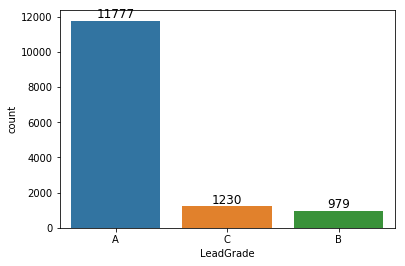

In [12]:
# Total Count of individual Lead Grades For all customers who WON / Opened an account.

print(data_iswon_1.LeadGrade.value_counts())
print('*='*50)
average  = (data_iswon_1['LeadGrade'].value_counts()/ data['LeadGrade'].value_counts())*100

print((data['LeadGrade'].value_counts()))
T1  = pd.DataFrame(average.index)
percentage = pd.DataFrame(average.values)
T1['percentage'] = percentage

per = []
for i in T1['percentage']:
    value = "%.2f"%i+"%"
    per.append(value)
T1['percentage'] = per
print(T1)


#Plot
ax = sns.countplot(data_iswon_1['LeadGrade'])
print('*='*50)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


<h1>Question 2:</h1><br>
<b>Objective: </b> Which campaigns have had the most success with generating qualified leads? <br>

<h3> Solution</h3>



In [13]:
print(data.shape)

(106210, 48)


In [14]:
data_qlead_1 = data[data['LeadsQualified']==1]
data_qlead_0 = data[data['LeadsQualified']==0]

print("Total number of LeadsQualified:", data_qlead_1.shape)
print("Total number of Leads UnQualified:", data_qlead_0.shape)

Total number of LeadsQualified: (35460, 48)
Total number of Leads UnQualified: (70750, 48)


Total Leads Qualified: 35460
********************
0    21474
1    13986
Name: isWon, dtype: int64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


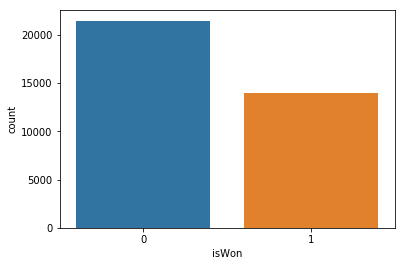

In [15]:
print("Total Leads Qualified:",data_qlead_1.shape[0])
print("*"*20)
print(data_qlead_1['isWon'].value_counts())
print("*="*50)
sns.countplot(data_qlead_1['isWon'])


In [16]:
data_qlead_1_iswon_1 = data_qlead_1[data_qlead_1['isWon']==1]
print(data_qlead_1_iswon_1.shape)

(13986, 48)


<p> <B>Percentage of "LEAD SOURCE GROUP"</B> </P> 

Success Percentage of every individual 'LEAD SOURCE GROUP' in generating qualified leads

                          0 Percentage
0             Digital Leads     37.98%
1                Sales Lead     14.24%
2              Inbound Call     11.92%
3                    Events      8.75%
4                 Specialty      8.29%
5             House Account      6.90%
6                  Webinars      6.25%
7                     Event      2.34%
8          Service to Sales      1.94%
9                      NONE      0.74%
10  New Marketing Campaigns      0.67%
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


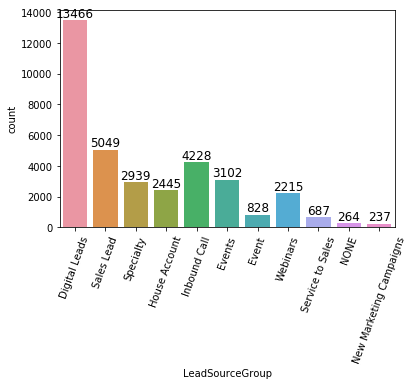

In [17]:
print("Success Percentage of every individual 'LEAD SOURCE GROUP' in generating qualified leads")
print("")
average_DQ = (data_qlead_1['LeadSourceGroup'].value_counts()/data_qlead_1.shape[0])*100
T2 = pd.DataFrame(average_DQ.index)
T2['Percentage'] = pd.DataFrame(average_DQ.values)

per_DQ = []
for j in T2['Percentage']:
    value_DQ = "%.2f"%j+"%"
    per_DQ.append(value_DQ)
T2['Percentage'] = per_DQ
print(T2)

print('*='*50)
DQ = sns.countplot(data_qlead_1.LeadSourceGroup)
for item in DQ.get_xticklabels():
    item.set_rotation(70)
for p in DQ.patches:
    DQ.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')    
    

Success Percentage of every individual 'LEAD SOURCE TYPE' in generating qualified leads

                                     0 Percentage
0                              Website     22.81%
1                                  PPC     12.87%
2                             Referral     12.01%
3                         Inbound Call     11.91%
4                          ETC Webinar      6.08%
5                        House Account      5.59%
6                 Special Time of Year      4.61%
7                    Educator Meetings      2.89%
8                    Client Cross Sell      2.34%
9                               NAREIA      2.34%
10                     NAREIA Meetings      1.97%
11                                 WBW      1.95%
12                    Service to Sales      1.94%
13                  Cross-Sell Account      1.41%
14              Incomplete Application      1.29%
15                        Social Media      0.94%
16                 Non NAREIA Meetings      0.94%
17         

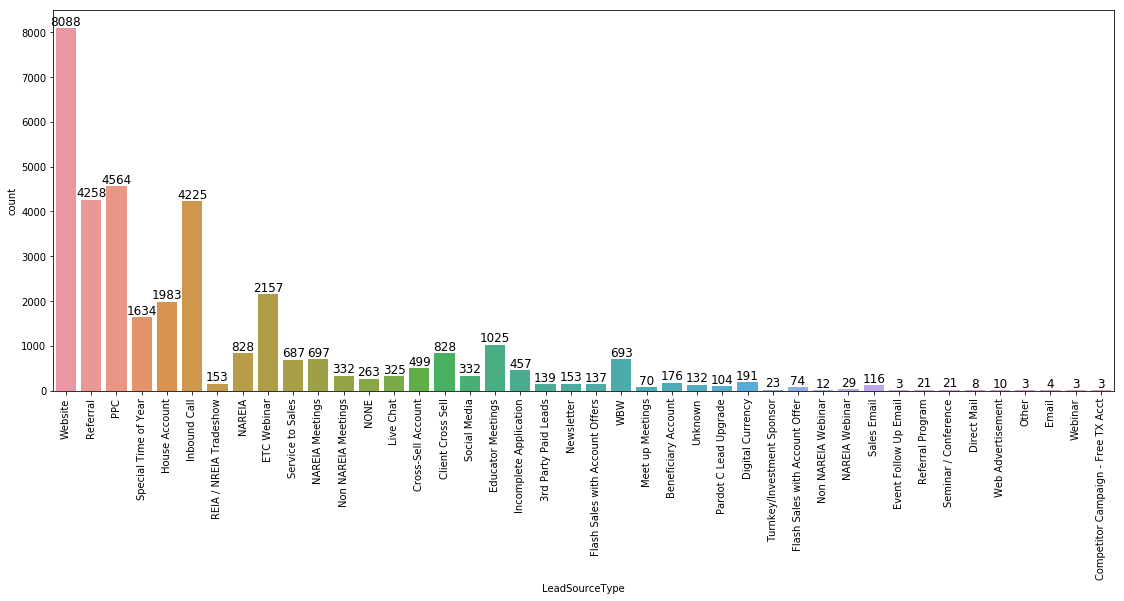

In [18]:
print("Success Percentage of every individual 'LEAD SOURCE TYPE' in generating qualified leads")
print("")
average_DQ = (data_qlead_1['LeadSourceType'].value_counts()/data_qlead_1.shape[0])*100
T2 = pd.DataFrame(average_DQ.index)
T2['Percentage'] = pd.DataFrame(average_DQ.values)

per_DQ = []
for j in T2['Percentage']:
    value_DQ = "%.2f"%j+"%"
    per_DQ.append(value_DQ)
T2['Percentage'] = per_DQ
print(T2)

print('*='*55)
dims = plt.figure(figsize = (19, 7))
DQ = sns.countplot(data_qlead_1.LeadSourceType)
for item in DQ.get_xticklabels():
    item.set_rotation(90)
for p in DQ.patches:
    DQ.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')    
    

<h1>Question 5:</h1><br>
<b>Objective: </b> What is the avg length of a sales cycle and is there a correlation between cycle length and likelihood of an account win (among cycles lasting > 1 week)? <br>

<h3> Solution</h3>



In [19]:
q5 = data
print(q5.shape)

print('*='*50)
q5 = q5[['LeadParentID','CycleSequence','CycleStartYearWeek','CycleStartDate','CycleEndDate','isWon']]
print(q5.head())

(106210, 48)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
         LeadParentID  CycleSequence CycleStartYearWeek CycleStartDate  \
0  00Q1A00001dnEKDUA2              1           2017-W24     2017-06-15   
1  00Q1A00001eAzgfUAC              1           2017-W28     2017-07-11   
2  0060h000016Z251AAC              1           2018-W27     2018-07-05   
3  00Q1A00001cmee8UAA              1           2017-W05     2017-02-03   
4  00Q0h00001fTyLHEA0              1           2018-W17     2018-04-25   

         CycleEndDate  isWon  
0 2099-09-09 00:00:00      0  
1 2017-08-11 03:02:57      0  
2 2018-07-13 00:00:00      1  
3 2017-05-03 11:33:47      0  
4 2018-09-18 10:54:15      0  


In [20]:
from datetime import datetime
q5['CycleStartDate'] = pd.to_datetime(q5['CycleStartDate'])
q5['CycleEndDate'] = pd.to_datetime(q5['CycleEndDate'])
print(q5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106210 entries, 0 to 106209
Data columns (total 6 columns):
LeadParentID          106210 non-null object
CycleSequence         106210 non-null int64
CycleStartYearWeek    106210 non-null object
CycleStartDate        106210 non-null datetime64[ns]
CycleEndDate          106210 non-null datetime64[ns]
isWon                 106210 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 4.9+ MB
None


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
from datetime import date
Start_Date = q5['CycleStartDate']
End_Date = q5['CycleEndDate']

date = Start_Date - End_Date
q5['date_diff'] = abs(date.dt.days)
print(q5.shape)
print('*='*50)
print(q5.head())

(106210, 7)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
         LeadParentID  CycleSequence CycleStartYearWeek CycleStartDate  \
0  00Q1A00001dnEKDUA2              1           2017-W24     2017-06-15   
1  00Q1A00001eAzgfUAC              1           2017-W28     2017-07-11   
2  0060h000016Z251AAC              1           2018-W27     2018-07-05   
3  00Q1A00001cmee8UAA              1           2017-W05     2017-02-03   
4  00Q0h00001fTyLHEA0              1           2018-W17     2018-04-25   

         CycleEndDate  isWon  date_diff  
0 2099-09-09 00:00:00      0      30036  
1 2017-08-11 03:02:57      0         32  
2 2018-07-13 00:00:00      1          8  
3 2017-05-03 11:33:47      0         90  
4 2018-09-18 10:54:15      0        147  


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
def variable(row):
    x = row['date_diff']
    if x>7:
        return 1
    return 0
q5['cycles_lasting> 1 week'] = q5.apply(variable, axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
data['date_diff'] = q5['date_diff']

In [24]:
q5_date_diff_G7 = q5[q5['cycles_lasting> 1 week']==1]
print(q5_date_diff_G7.shape)

q5_date_diff_G = q5[q5['cycles_lasting> 1 week']==0]
print(q5_date_diff_G.shape)

(69971, 8)
(36239, 8)


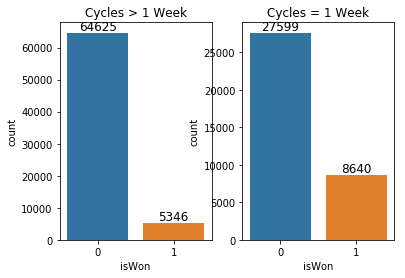

In [25]:
plt.subplot(121)
plt.title("Cycles > 1 Week")
DD1 = sns.countplot(q5_date_diff_G7['isWon'])
for p in DD1.patches:
    DD1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.subplot(122)
plt.title("Cycles = 1 Week")
DD2 = sns.countplot(q5_date_diff_G['isWon'])
for p in DD2.patches:
    DD2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [26]:
# def iswon(row):
#     x = row['isWon']
#     if x==0:
#         return "zero"
#     return "one"
# q5_date_diff_G7['isWon_Cat'] = q5_date_diff_G7.apply(iswon, axis=1)

In [27]:
# def cycle_lasting(row):
#     x = row['cycles_lasting> 1 week']
#     if x==0:
#         return "zero"
#     return "one"
# q5_date_diff_G7['cycles_lasting> 1 week_Cat'] = q5_date_diff_G7.apply(cycle_lasting, axis=1)

In [28]:
# q5_date_diff_G7['isWon_Cat'] = q5_date_diff_G7['isWon_Cat'].astype('category').cat.codes
# q5_date_diff_G7['cycles_lasting> 1 week_Cat'] = q5_date_diff_G7['cycles_lasting> 1 week_Cat'].astype('category').cat.codes

In [29]:
corr_data = q5_date_diff_G7[['LeadParentID','isWon','date_diff']]

<p> correlation between cycle length and likelihood of an account win (among cycles lasting > 1 week) is <b>"Negatively Correlated"</b> <br><br> which tells us there is no correlation between the features "Cycle length" and "isWon" <br>
    which mean it is not necessary that cycles lasting >1 week will have high success rate in winning an account.

In [30]:
import seaborn as sns
corr_df = corr_data.corr(method = 'pearson')
# mask = np.zeros_like(corr_df)

map = cmap=sns.diverging_palette(5, 240, as_cmap=True)
corr_df.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_precision(2)

,isWon,date_diff
isWon,1,-0.11
date_diff,-0.11,1


In [31]:
q5_date_diff_G7.corr(method ='spearman') 

,CycleSequence,isWon,date_diff,cycles_lasting> 1 week
CycleSequence,1.000000,-0.116451,-0.063622,NaN
isWon,-0.116451,1.000000,-0.139088,NaN
date_diff,-0.063622,-0.139088,1.000000,NaN
cycles_lasting> 1 week,NaN,NaN,NaN,NaN


<h1>Question 4:</h1><br>
<b>Objective: </b> What is the projected # of accounts that will open in Q3 of 2019? <br>

<h3> Solution</h3>



In [32]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [33]:
print(data.shape)

(106210, 49)


In [34]:
data['CycleStartYear'].min(), data['CycleStartYear'].max()

(2017, 2019)

<h1>Model </h1>:

<p> Building a Logistic Regression model on the ETC dataset </p>


In [35]:
model_data = data
print(model_data.shape)
print('*='*20)
# print(model_data.columns)

(106210, 49)
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


In [36]:
model_data = model_data[model_data['CycleEndDate'].dt.year != 2099]
model_data.shape

(97326, 49)

In [37]:
# model_data = model_data[['CycleStartDate', 'CycleEndDate','CycleStartMonthName','CycleStartDayName','LeadID','CampaignName', 'CampaignType',
#        'CampaignGroup','CampaignStatus','InitialCreatedByDepartment', 'InitialCreatedByTitle',
#        'InitialLeadSource','CycleSequence',
#        'CycleLeadSource', 'LeadSourceGroup', 'LeadSourceType', 'isCrossSell','AcctsOpened', 'isWon',
#         'LeadScore', 'LeadGrade', 'LeadsEngaged','LeadsQualified', 'LeadsPromoted','date_diff']]

In [38]:
# Removing the all Active Leads which have the end year 2099


In [39]:
# print(model_data.head(2))

Percentage of Accounts won: 14.370260773071944
Percentage of Accounts Lost: 85.62973922692805
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


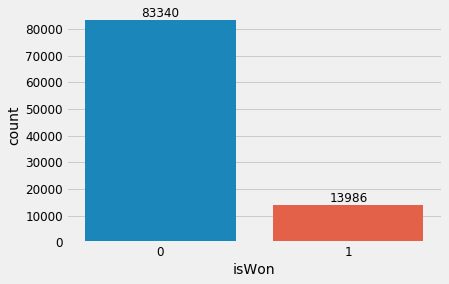

In [40]:
count_iswon_1 = len(model_data[model_data['isWon']==1])
count_iswon_0 = len(model_data[model_data['isWon']==0])
pct_iswon_1 = (count_iswon_1 / (count_iswon_1+count_iswon_0))*100
pct_iswon_0 = (count_iswon_0 / (count_iswon_1+count_iswon_0))*100
print("Percentage of Accounts won:" ,pct_iswon_1)
print("Percentage of Accounts Lost:" ,pct_iswon_0)
print("*="*50)
DL = sns.countplot(model_data.isWon)
for p in DL.patches:
    DL.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

Our classes are imbalanced and ratio of Accounts Won to Accounts Lost is 86:14

In [41]:
model_data.groupby('isWon').mean()

,CycleStartDateKey,CycleStartYear,CycleStartYearMonth,CycleSequence,isCrossSell,AcctsOpened,FeesAssessed,FeesNotInvoiced,FeesPaid,FeesUnpaid,FeesWrittenOff,LeadScore,YearCycleSequece,LeadsEngaged,LeadsQualified,LeadsPromoted,date_diff
isWon,,,,,,,,,,,,,,,,,
0,2.017724e+07,2017.665587,201772.278246,1.560475,0.086633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.386093,1.121946,0.508987,0.172006,0.137593,32.781329
1,2.017831e+07,2017.771343,201782.912055,1.166452,0.175318,1.001502,0.755255,0.053911,0.735807,0.019448,0.233877,86.309595,1.209066,1.000000,1.000000,1.000000,16.633348


The Average number of leads who won the Accounts are more than the Leads who lost.

In [42]:
model_data.groupby('CampaignGroup').mean()

,CycleStartDateKey,CycleStartYear,CycleStartYearMonth,CycleSequence,isCrossSell,AcctsOpened,isWon,FeesAssessed,FeesNotInvoiced,FeesPaid,FeesUnpaid,FeesWrittenOff,LeadScore,YearCycleSequece,LeadsEngaged,LeadsQualified,LeadsPromoted,date_diff
CampaignGroup,,,,,,,,,,,,,,,,,,
Digital Leads,2.017735e+07,2017.676739,201773.334934,1.412439,0.044149,0.076910,0.076839,0.060435,0.002568,0.058604,0.001831,0.017474,72.913295,1.092601,0.516523,0.218867,0.187770,30.338786
Events,2.017727e+07,2017.663049,201772.518356,1.436312,0.072116,0.113984,0.113754,0.053798,0.009774,0.052259,0.001539,0.052490,67.740783,1.116524,0.575695,0.230663,0.194643,32.342184
New Marketing Campaigns,2.018314e+07,2018.234742,201831.256455,1.329812,0.193075,0.039906,0.039906,0.025235,0.005282,0.022887,0.002347,0.011737,68.138498,1.124413,0.477700,0.106221,0.084507,17.664319
Specialty,2.017703e+07,2017.637972,201770.175794,2.272229,0.204194,0.076351,0.076086,0.052375,0.005043,0.051048,0.001327,0.021322,74.224188,1.336813,0.510661,0.168805,0.140405,29.607184
Webinars,2.017798e+07,2017.742334,201779.627342,2.014267,0.186968,0.088373,0.088373,0.069208,0.003833,0.067078,0.002129,0.020443,70.990204,1.243612,0.540034,0.203365,0.166738,33.794080


In [43]:
model_data.groupby('LeadSourceGroup').mean()

,CycleStartDateKey,CycleStartYear,CycleStartYearMonth,CycleSequence,isCrossSell,AcctsOpened,isWon,FeesAssessed,FeesNotInvoiced,FeesPaid,FeesUnpaid,FeesWrittenOff,LeadScore,YearCycleSequece,LeadsEngaged,LeadsQualified,LeadsPromoted,date_diff
LeadSourceGroup,,,,,,,,,,,,,,,,,,
Digital Leads,2.017707e+07,2017.650585,201770.559892,1.425809,0.049270,0.075144,0.075062,0.061336,0.002438,0.059554,0.001782,0.014935,72.287526,1.087477,0.504558,0.214103,0.184807,29.975396
Event,2.017819e+07,2017.760870,201781.717391,1.291063,0.144928,1.003623,1.000000,0.056763,0.022947,0.054348,0.002415,0.925121,85.229469,1.329710,1.000000,1.000000,1.000000,25.707729
Events,2.017726e+07,2017.663102,201772.473223,1.447028,0.061614,0.073781,0.073704,0.054638,0.009688,0.053088,0.001550,0.011548,66.984810,1.101294,0.556615,0.195381,0.157793,32.623808
House Account,2.017763e+07,2017.702566,201776.149689,1.103810,0.365086,0.539658,0.538491,0.415630,0.034215,0.407076,0.008554,0.106921,81.095645,1.241835,0.903577,0.801322,0.793935,36.521773
Inbound Call,2.017575e+07,2017.522390,201757.351897,1.230093,0.022798,0.301742,0.301254,0.260707,0.006839,0.255984,0.004722,0.051946,90.787820,1.064485,0.837486,0.645823,0.611952,38.603810
NONE,2.017610e+07,2017.564815,201760.851852,1.070988,0.182099,0.586420,0.586420,0.401235,0.148148,0.398148,0.003086,0.046296,6.728395,1.293210,0.746914,0.740741,0.740741,8.688272
New Marketing Campaigns,2.018313e+07,2018.233136,201831.105325,1.330769,0.186982,0.036686,0.036686,0.024260,0.004734,0.021893,0.002367,0.010059,68.057988,1.120710,0.473373,0.102959,0.081657,17.564497
Sales Lead,2.017947e+07,2017.889018,201794.564497,1.096310,0.173010,0.509297,0.508716,0.414439,0.031377,0.403835,0.010604,0.086723,88.968187,1.113306,0.875944,0.687536,0.664003,24.859239
Service to Sales,2.018069e+07,2018.003387,201806.724809,1.083827,0.538527,0.278577,0.277731,0.199831,0.014395,0.191363,0.008467,0.071973,96.303980,1.187130,0.831499,0.461473,0.438611,26.825572


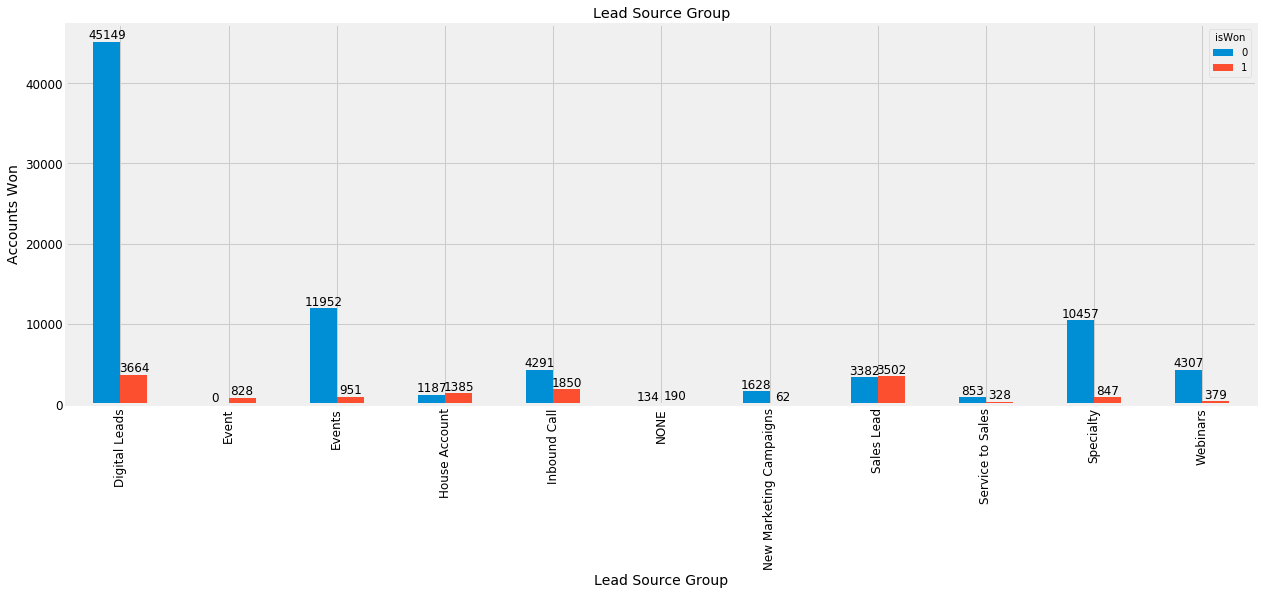

In [44]:
%matplotlib inline

LSG = pd.crosstab(model_data.LeadSourceGroup,model_data.isWon).plot(kind='bar', figsize = (19, 7))
plt.title('Lead Source Group')
plt.xlabel('Lead Source Group')
plt.ylabel('Accounts Won')
for p in LSG.patches:
    LSG.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


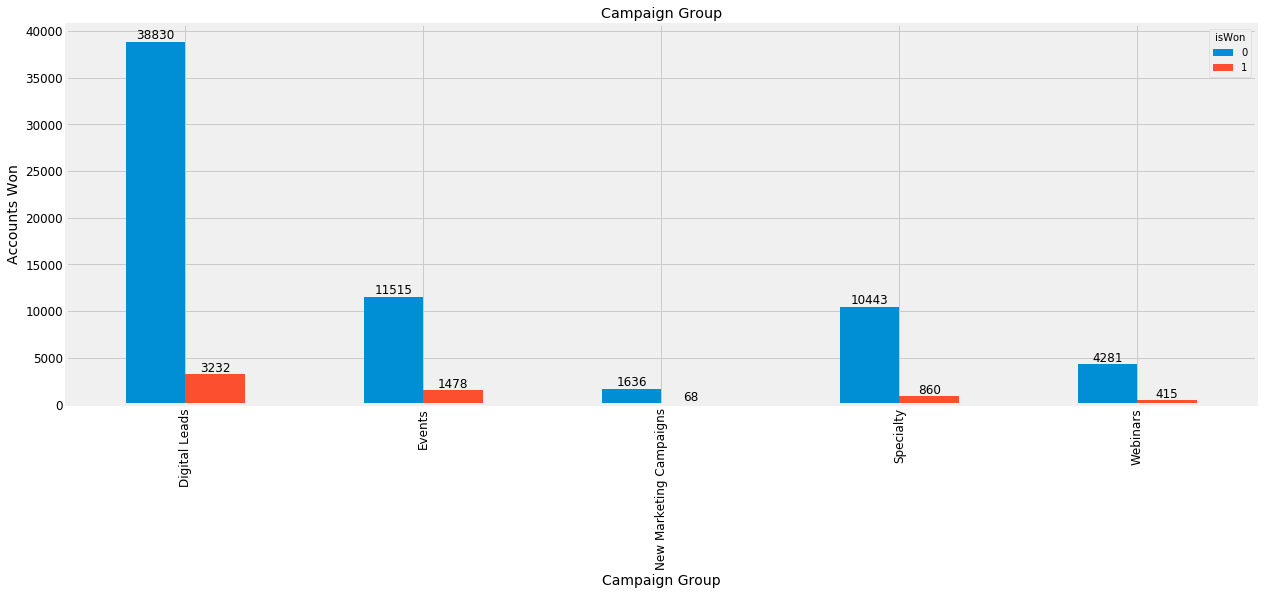

In [45]:
%matplotlib inline
CG = pd.crosstab(model_data.CampaignGroup,model_data.isWon).plot(kind='bar', figsize = (19, 7))
plt.title('Campaign Group')
plt.xlabel('Campaign Group')
plt.ylabel('Accounts Won')
for p in CG.patches:
    CG.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

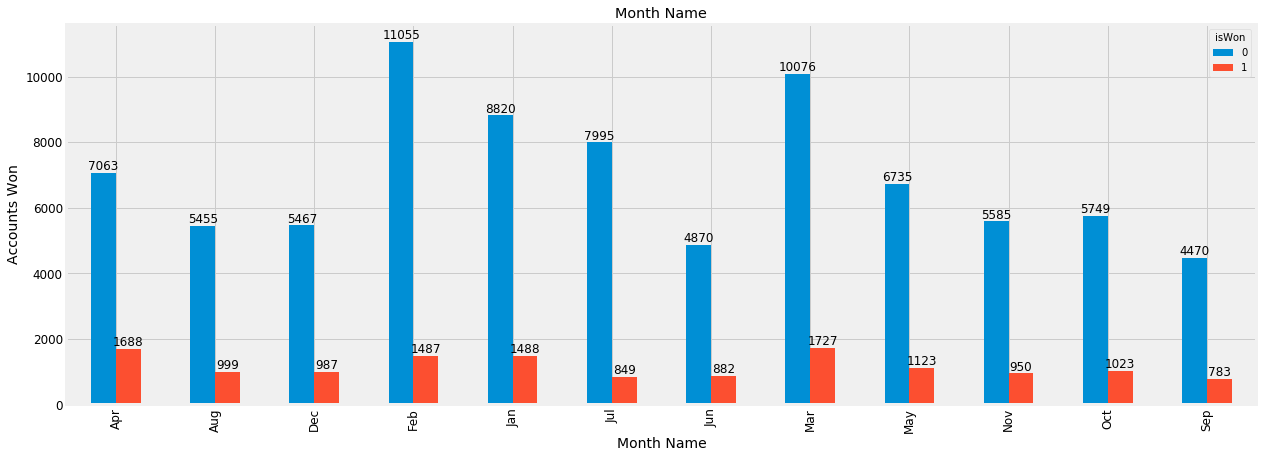

In [46]:
%matplotlib inline
MN = pd.crosstab(model_data.CycleStartMonthName,model_data.isWon).plot(kind='bar', figsize = (19,7))
plt.title('Month Name')
plt.xlabel('Month Name')
plt.ylabel('Accounts Won')
for p in MN.patches:
    MN.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

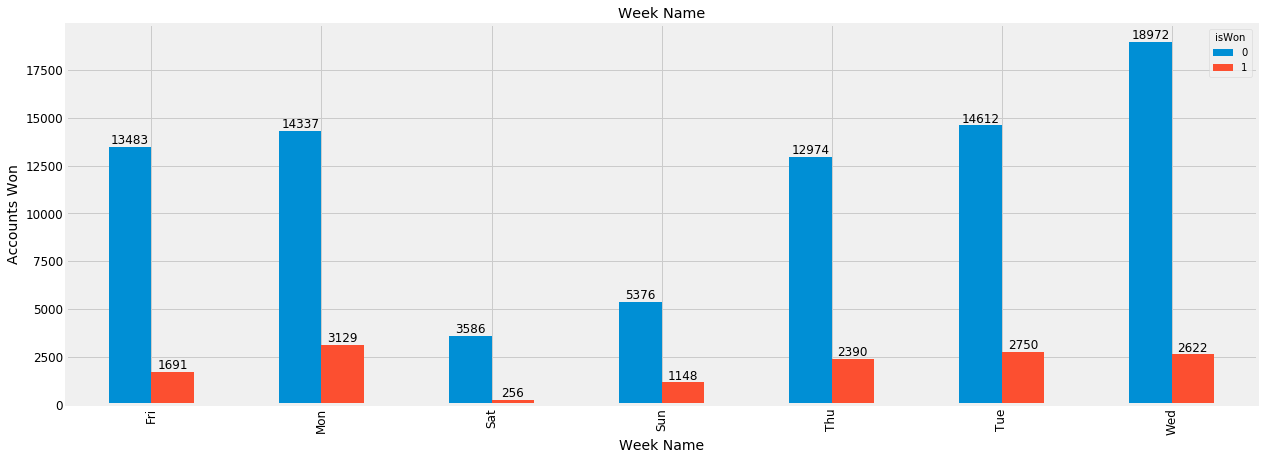

In [47]:
%matplotlib inline
WN = pd.crosstab(model_data.CycleStartDayName,model_data.isWon).plot(kind='bar', figsize=(19,7))
plt.title('Week Name')
plt.xlabel('Week Name')
plt.ylabel('Accounts Won')
for p in WN.patches:
    WN.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [48]:
def date_range(row):
    x = row['date_diff']
    if x>=0 and x<=100:
        return "0-100"
    if x>100 and x<=200:
        return "100-200"
    if x>200 and x<=300:
        return "200-300"
    if x>300 and x<=400:
        return "300-400"
    if x>400 and x<=500:
        return "400-500"
    if x>500 and x<=600:
        return "500-600"
    if x>600 and x<=700:
        return "600-700"
    if x>700 and x<=800:
        return "700-800"
    if x>800 and x<=900:
        return "800-900"
model_data['date_range'] = model_data.apply(date_range, axis =1)    


In [49]:
print(data.shape)
print(data[data['CycleEndDate'].dt.year != 2099].shape)
print(data[data['CycleEndDate'].dt.year == 2099].shape)
print()
print(model_data['date_range'].value_counts())

(106210, 49)
(97326, 49)
(8884, 49)

0-100      91118
100-200     4129
200-300     1289
300-400      443
400-500      245
500-600       85
600-700       15
700-800        1
800-900        1
Name: date_range, dtype: int64


In [50]:
model_data_iswon_1 = model_data[model_data['isWon']==1]
model_data_iswon_0 = model_data[model_data['isWon']==0]

Text(0.5,1,'Data Distribution in days for Accounts Lost')

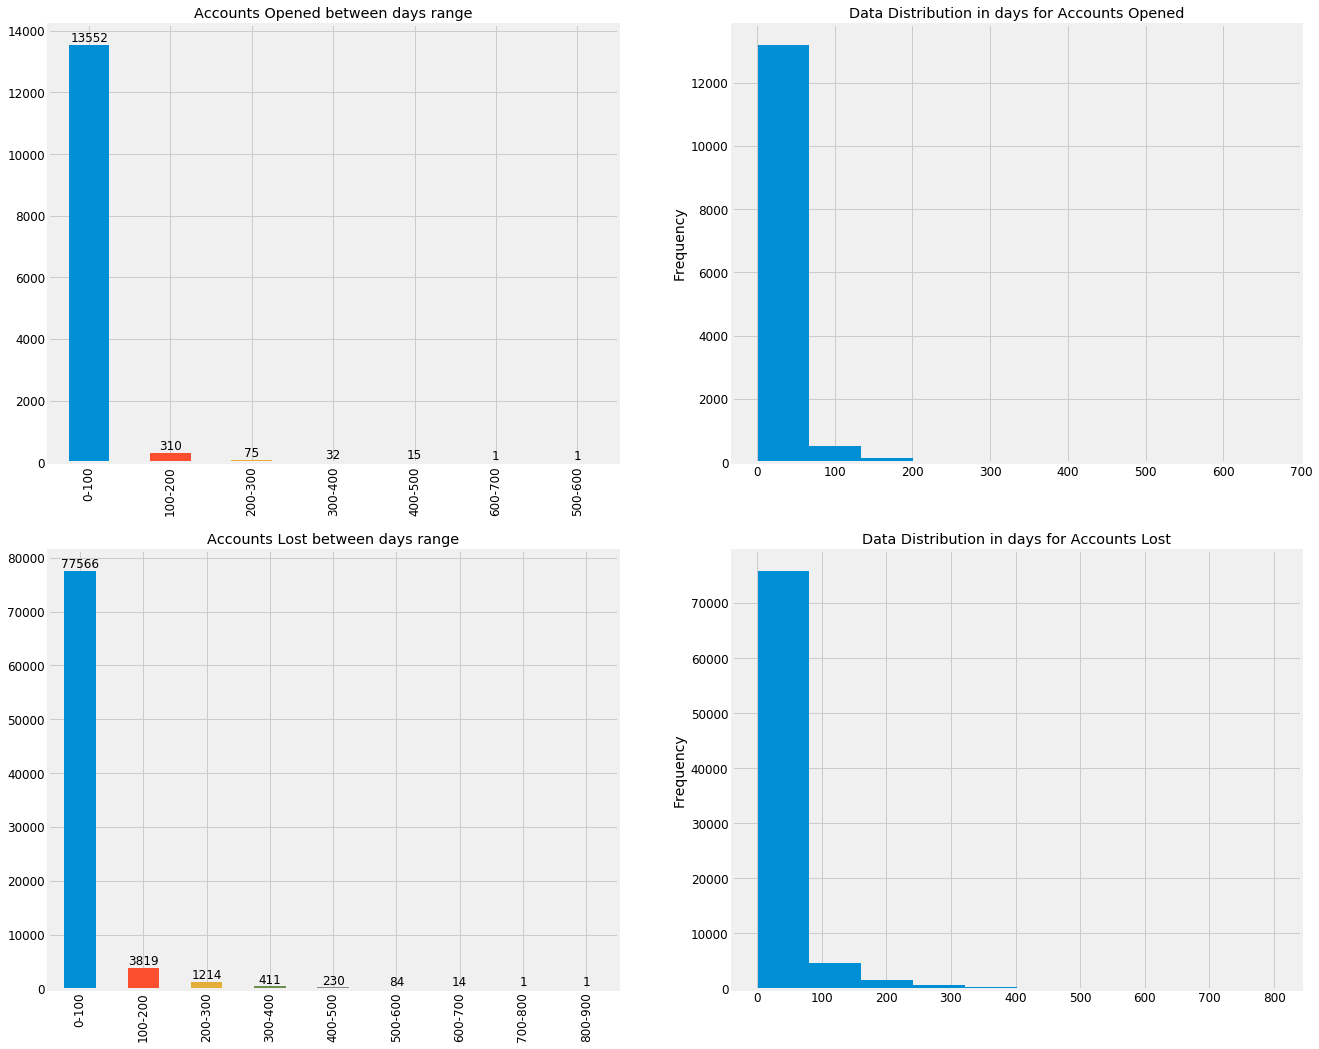

In [51]:
plt.subplot(221)
DR = model_data_iswon_1['date_range'].value_counts().plot(kind='bar', figsize=(20,8))
plt.title ("Accounts Opened between days range")
for p in DR.patches:
    DR.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.subplot(222)
model_data_iswon_1['date_diff'].plot(kind='hist', figsize=(20,8))
# plt.grid()
plt.title("Data Distribution in days for Accounts Opened")
plt.subplot(223)
DR = model_data_iswon_0['date_range'].value_counts().plot(kind='bar', figsize=(20,5))
plt.title ("Accounts Lost between days range")
for p in DR.patches:
    DR.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.subplot(224)
model_data_iswon_0['date_diff'].plot(kind='hist', figsize=(20,8))
# plt.grid()
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.8, wspace=None, hspace=None)
plt.title("Data Distribution in days for Accounts Lost")


Accounts  "OPENED / LOST" mostly happened between 0 - 100 days.

In [52]:
test = model_data[model_data['date_range']=='0-100']
print(len(test.CycleStartYearWeek.value_counts()))
print('*='*30)
model_data.head(2)

127
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


,CycleStartDateKey,CycleStartDate,CycleStartYear,CycleStartQuarter,CycleStartYearQuarter,CycleStartYearMonth,CycleStartYearMonthName,CycleStartMonthName,CycleStartMonthNameLong,CycleStartYearWeek,...,FeesUnpaid,FeesWrittenOff,LeadScore,LeadGrade,YearCycleSequece,LeadsEngaged,LeadsQualified,LeadsPromoted,date_diff,date_range
1,20170711,2017-07-11,2017,Q3,2017 Q3,201707,2017 Jul,Jul,July,2017-W28,...,0,0,65,B,1,1,0,0,32,0-100
2,20180705,2018-07-05,2018,Q3,2018 Q3,201807,2018 Jul,Jul,July,2018-W27,...,0,0,100,A,1,1,1,1,8,0-100


In [354]:
## Selecting Features

model_data_filtered = model_data[['CycleStartDate','CycleStartMonthNameLong','CycleStartYearWeek','CycleStartDayName','CycleEndDate','LeadCycleHasCampaignSource','date_diff','InitialRecordType','CyclePhase',
                         'CycleSequence','CycleLeadSource','LeadSourceGroup','LeadSourceType','isCrossSell','CycleOwnerTitle','LeadScore',
                         'DepartmentInitiatingSalesCycle','LeadsEngaged','LeadsQualified','LeadsPromoted','CycleLeadSource','isWon']]

<b>Notes:</b>
1. Considering the columnn "LeadSourceType" instead of "CampaignType" to avoid NULL.
2. Considered the column "LeasSourceGroup" instead of "CampaignGroup" to avoid NULL.

In [54]:
# print(model_data_filtered.head(10))

In [55]:
model_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97326 entries, 1 to 106209
Data columns (total 21 columns):
CycleStartDate                    97326 non-null datetime64[ns]
CycleStartMonthNameLong           97326 non-null object
CycleStartYearWeek                97326 non-null object
CycleStartDayName                 97326 non-null object
CycleEndDate                      97326 non-null datetime64[ns]
LeadCycleHasCampaignSource        97326 non-null object
date_diff                         97326 non-null int64
InitialRecordType                 97325 non-null object
CyclePhase                        97326 non-null object
CycleSequence                     97326 non-null int64
CycleLeadSource                   97326 non-null object
LeadSourceGroup                   97326 non-null object
LeadSourceType                    97326 non-null object
isCrossSell                       97326 non-null int64
CycleOwnerTitle                   97326 non-null object
LeadScore                         973

In [56]:
## Sorting the data based on the "CycleStartDate"

model_data_filtered = model_data_filtered.sort_values(['CycleStartDate'], axis =0, ascending = False)

In [57]:
print(model_data_filtered.head(2))
print(model_data_filtered.columns)

      CycleStartDate CycleStartMonthNameLong CycleStartYearWeek  \
12612     2019-06-02                    June           2019-W22   
30357     2019-06-02                    June           2019-W22   

      CycleStartDayName        CycleEndDate LeadCycleHasCampaignSource  \
12612               Sun 2019-06-02 16:33:45            Campaign Source   
30357               Sun 2019-06-02 09:47:30        Non-Campaign Source   

       date_diff   InitialRecordType CyclePhase  CycleSequence  ...    \
12612          1  ETC Marketing Lead   Nurtured              3  ...     
30357          1      ETC Sales Lead   Nurtured              2  ...     

      LeadSourceGroup LeadSourceType isCrossSell    CycleOwnerTitle LeadScore  \
12612       Specialty     Newsletter           0              House        65   
30357    Inbound Call   Inbound Call           0  Account Executive       100   

       DepartmentInitiatingSalesCycle LeadsEngaged  LeadsQualified  \
12612                       Marketing    

## Imputing the Missing Values
<p> we have only one column <b>"InitialRecordType"</b> which is having only 1 missing values. hence I am removing that row to reduce the effort.</p>

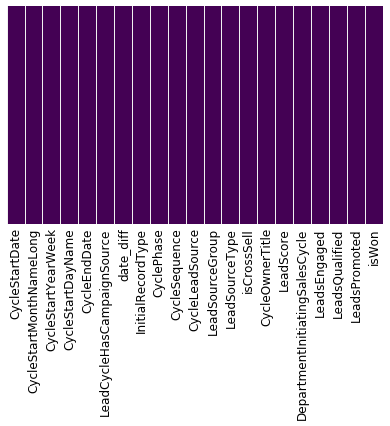

In [58]:
sns.heatmap(model_data_filtered.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
model_data_filtered = model_data_filtered[model_data_filtered['InitialRecordType'].notnull()]

print(model_data_filtered.shape)
print(model_data_filtered.columns)


(97325, 21)
Index(['CycleStartDate', 'CycleStartMonthNameLong', 'CycleStartYearWeek',
       'CycleStartDayName', 'CycleEndDate', 'LeadCycleHasCampaignSource',
       'date_diff', 'InitialRecordType', 'CyclePhase', 'CycleSequence',
       'CycleLeadSource', 'LeadSourceGroup', 'LeadSourceType', 'isCrossSell',
       'CycleOwnerTitle', 'LeadScore', 'DepartmentInitiatingSalesCycle',
       'LeadsEngaged', 'LeadsQualified', 'LeadsPromoted', 'isWon'],
      dtype='object')


In [359]:
model_data_filtered['CycleLeadSource'] = model_data_filtered['CycleLeadSource'].astype(str)

## Feature Importance

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

h1 = model_data_filtered['CycleStartDate']
h2 = model_data_filtered['CycleStartMonthNameLong']
h3 = model_data_filtered['CycleStartYearWeek']
h4 = model_data_filtered['CycleStartDayName']
h5 = model_data_filtered['CycleEndDate']
h6 = model_data_filtered['LeadCycleHasCampaignSource']
h7 = model_data_filtered['LeadSourceType']
h8 = model_data_filtered['InitialRecordType']
h9 = model_data_filtered['CyclePhase']
# h10 = model_data_filtered['CycleLeadSource']
h11 = model_data_filtered['LeadSourceGroup']
h12 = model_data_filtered['CycleOwnerTitle']
h13 = model_data_filtered['DepartmentInitiatingSalesCycle']
h14 = model_data_filtered['CycleLeadSource']


le = LabelEncoder()

CycleStartDate = le.fit_transform(h1)
CycleStartMonthNameLong = le.fit_transform(h2)
CycleStartYearWeek = le.fit_transform(h3)
CycleStartDayName = le.fit_transform(h4)
CycleEndDate = le.fit_transform(h5)
LeadCycleHasCampaignSource = le.fit_transform(h6)
LeadSourceType = le.fit_transform(h7)
InitialRecordType = le.fit_transform(h8)
CyclePhase = le.fit_transform(h9)
CycleLeadSource = le.fit_transform(h10)
LeadSourceGroup = le.fit_transform(h11)
CycleOwnerTitle = le.fit_transform(h12)
DepartmentInitiatingSalesCycle = le.fit_transform(h13)


#Creating the dataframe
feature = pd.DataFrame(model_data_filtered.index)
feature['CycleStart_Date'] = CycleStartDate.reshape(-1,1)
feature['CycleStartMonthNameLong'] = CycleStartMonthNameLong.reshape(-1,1)
feature['CycleStartYearWeek'] = CycleStartYearWeek.reshape(-1,1)
feature['CycleStartDayName'] = CycleStartDayName.reshape(-1,1)
feature['CycleEndDate'] = CycleEndDate.reshape(-1,1)
feature['LeadCycleHasCampaignSource'] = LeadCycleHasCampaignSource.reshape(-1,1)
feature['LeadSourceType'] = LeadSourceType.reshape(-1,1)
feature['InitialRecordType'] = InitialRecordType.reshape(-1,1)
feature['CyclePhase'] = CyclePhase.reshape(-1,1)
feature['CycleLeadSource'] = CycleLeadSource.reshape(-1,1)
feature['LeadSourceGroup'] = LeadSourceGroup.reshape(-1,1)
feature['CycleOwnerTitle'] = CycleOwnerTitle.reshape(-1,1)
feature['DepartmentInitiatingSalesCycle'] = DepartmentInitiatingSalesCycle.reshape(-1,1)


feature['isCrossSell'] = model_data_filtered['isCrossSell'].reshape(-1,1)
feature['LeadScore'] = model_data_filtered['LeadScore'].reshape(-1,1)
feature['date_diff'] = model_data_filtered['date_diff'].reshape(-1,1)
feature['CycleSequence'] = model_data_filtered['CycleSequence'].reshape(-1,1)
feature['LeadsQualified'] = model_data_filtered['LeadsQualified'].reshape(-1,1)
feature['LeadsEngaged'] = model_data_filtered['LeadsEngaged'].reshape(-1,1)
feature['LeadsPromoted'] = model_data_filtered['LeadsPromoted'].reshape(-1,1)
feature['isWon'] = model_data_filtered['isWon'].reshape(-1,1)


feature = feature[['CycleStart_Date','CycleStartMonthNameLong','CycleStartYearWeek','CycleStartDayName','CycleEndDate'
                   ,'LeadCycleHasCampaignSource', 'LeadSourceType', 'InitialRecordType','CyclePhase',
                   'LeadSourceGroup', 'CycleOwnerTitle', 'DepartmentInitiatingSalesCycle','isCrossSell','LeadScore',
                   'date_diff','CycleSequence','LeadsQualified','LeadsEngaged','LeadsPromoted','CycleLeadSource','isWon']]


                                                                               
# print(feature.columns)
# print(feature.shape)
# print(feature.info())

In [103]:
Train = feature[:68129]
Test = feature[68129:97325]
# CV = data[750:]
print ('*'*50)
print(Train.shape, Test.shape)

**************************************************
(68129, 20) (29196, 20)


In [104]:
Train_X = Train.iloc[:,:-1].values
Train_Y = Train.iloc[:,-1].values
print(Train_X.shape, Train_Y.shape)
print('*'*50)
Test_X = Test.iloc[:,:-1].values
Test_Y = Test.iloc[:,-1].values
print(Test_X.shape, Test_Y.shape)

(68129, 19) (68129,)
**************************************************
(29196, 19) (29196,)


In [105]:
model = LogisticRegression()
model.fit(Train_X, Train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred2 = model.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.92


In [64]:
features = feature.keys()
# features = list(Train.drop('Outcome',1).columns)
features
coef = list(model.coef_[0])
coef

[-0.01631709864880394,
 -0.09090522785513747,
 -0.050075216870347494,
 -0.02119195005477707,
 0.0002774707104868289,
 0.36294867432471245,
 -0.006541160866511914,
 -0.027515684656018898,
 -0.2421138192764387,
 0.041235474364996784,
 0.038484236261877997,
 0.005931492743750097,
 0.032764783325021904,
 0.0007507539243296182,
 -0.04404478812711611,
 -0.43670831132625537,
 1.3786028428636274,
 0.5754549341777727,
 1.4722383734501465]

In [65]:
feature1 = pd.DataFrame()
feature1['Importance'] = features[0:19]
# feature['Importance'] = list(X.drop('Outcome',1).columns)
feature1['values'] = coef
feature1.sort_values(by = ['values'], inplace =True, ascending =True)
feature1


,Importance,values
15,CycleSequence,-0.436708
8,CyclePhase,-0.242114
1,CycleStartMonthNameLong,-0.090905
2,CycleStartYearWeek,-0.050075
14,date_diff,-0.044045
7,InitialRecordType,-0.027516
3,CycleStartDayName,-0.021192
0,CycleStart_Date,-0.016317
6,LeadSourceType,-0.006541
4,CycleEndDate,0.000277


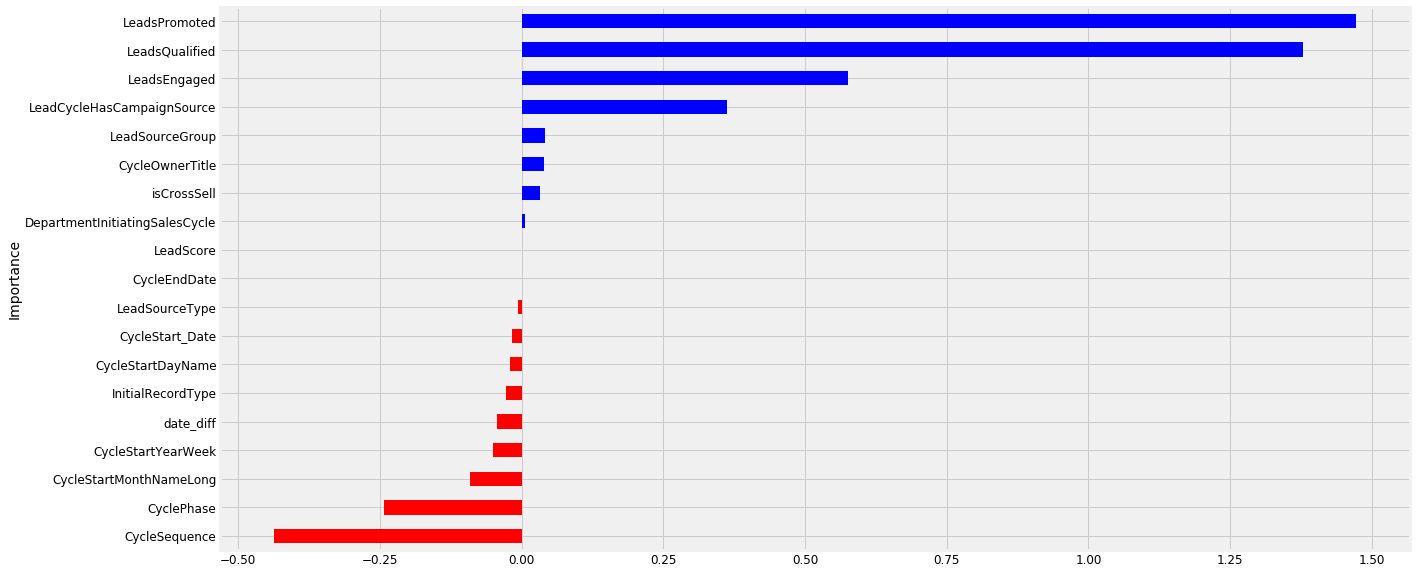

In [66]:
feature1['positive'] = feature1['values'] >0
feature1.set_index('Importance', inplace=True)
dims = plt.figure(figsize = (19, 10))
feature1['values'].plot(kind='barh', color = feature1['positive'].map({True:'blue', False:'Red'}))

In [67]:

# load data
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = feature[0:12]
# dataframe = read_csv(url, names=names)
# array = dataframe.values
X = Train.iloc[:,:-1].values
Y = Train.iloc[:,-1].values

# print(X.keys())

# feature extraction
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)

print(("Num Features: %d") % fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_)

# print(n_features)

Num Features: 9
Selected Features: [False False False False False  True False  True  True  True False False
  True False  True False  True  True  True]
Feature Ranking: [ 6  4  5  2 11  1  9  1  1  1  7  3  1 10  1  8  1  1  1]


<P><b>Features selected based on RFE results:</b></P> 'LeadCycleHasCampaignSource', 'InitialRecordType', 'CyclePhase', 'LeadSourceGroup', 'isCrossSell', 'date_diff', 'LeadsQualified', 'LeadsEngaged', 'LeadsPromoted'

In [68]:
feature.columns

Index(['CycleStart_Date', 'CycleStartMonthNameLong', 'CycleStartYearWeek',
       'CycleStartDayName', 'CycleEndDate', 'LeadCycleHasCampaignSource',
       'LeadSourceType', 'InitialRecordType', 'CyclePhase', 'LeadSourceGroup',
       'CycleOwnerTitle', 'DepartmentInitiatingSalesCycle', 'isCrossSell',
       'LeadScore', 'date_diff', 'CycleSequence', 'LeadsQualified',
       'LeadsEngaged', 'LeadsPromoted', 'isWon'],
      dtype='object')

In [69]:
# dims = plt.figure(figsize = (19, 10))
# feature1['values'].plot(kind='barh', color = fit.n_features.map({True:'blue', False:'Red'}))

Lasso

In [70]:
# from sklearn.feature_selection import SelectFromModel
# sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
# sel_.fit(X,Y)

In [71]:
# sel_.get_support()

In [72]:
# np.sum(sel_.estimator_.coef_ == 0)

In [73]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X) 
# X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

# clf = LogisticRegression(random_state = 0)
# clf.fit(X_scaled, Y)

# feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5

# featfig = plt.figure()
# featax = featfig.add_subplot(1, 1, 1)
# featax.barh(pos, feature_importance[sorted_idx], align='center')
# featax.set_yticks(pos)
# featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
# featax.set_xlabel('Relative Feature Importance')

# plt.tight_layout()   
# plt.show()

In [74]:
# harsha

# Training the Model 

### Vectorizing the columns

In [75]:
# # Applying Label Encoding for Dates and Lead ID:

# U = model_data_filtered['CycleStartYearWeek']
# V = model_data_filtered['CycleStartDayName']
# W = model_data_filtered['CycleStartMonthName']
# X = model_data_filtered['CycleStartDate']
# Y = model_data_filtered['CycleEndDate']
# # Z = model_data_filtered['LeadGrade']
# le = LabelEncoder()
# LeadID = le.fit_transform(W)
# CycleStartDate = le.fit_transform(X)
# CycleEndDate = le.fit_transform(Y)
# # LeadGrade = le.fit_transform(Z)
# print("Shape of 'LeadID':",LeadID.shape)
# print("Shape of 'Cycle Start Date':",CycleStartDate.shape)
# print("Shape of 'Cycle End Date':",CycleEndDate.shape)
# # print("Shape of 'Lead Grades':",len(LeadGrade))
# Lead_ID = LeadID.reshape(-1,1)
# CycleStart_Date = CycleStartDate.reshape(-1,1)
# CycleEnd_Date = CycleEndDate.reshape(-1,1)
# print('*='*10)
# print(Lead_ID.dtype)
# print(CycleStart_Date.dtype)
# print(CycleEnd_Date.dtype)


In [199]:
print(model_data_filtered.shape)

(97325, 21)


In [203]:
from sklearn import preprocessing

## Applied ONE HOT ENCODING for "LeadGrade, LeadSourceGroup, LeadSoruceType"

Onehot = model_data_filtered
# Onehot.columns


# OHE = Onehot.select_dtypes(include=[object])
OHE = Onehot[['InitialRecordType','LeadSourceGroup', 'LeadCycleHasCampaignSource','CyclePhase']]
le = preprocessing.LabelEncoder()
X_2 = OHE.apply(le.fit_transform)
X_2.head()
enc = preprocessing.OneHotEncoder()
enc.fit(X_2)
LI_LG_LSG_LST = enc.transform(X_2)
LI_LG_LSG_LST.dtype
print(LI_LG_LSG_LST.shape)

print(LI_LG_LSG_LST.dtype)

(97325, 33)
float64


In [77]:
### Reshaping other columns  "date_diff, CycleSequence, AcctsOpened, LeadsQualified, LeadsEngaged, LeadsPromoted"

date_diff = model_data_filtered['date_diff'].values.reshape(-1,1)
# CycleSequence = model_data_filtered['CycleSequence'].values.reshape(-1,1)
# AcctsOpened = model_data_filtered['AcctsOpened'].values.reshape(-1,1)
LeadsQualified = model_data_filtered['LeadsQualified'].values.reshape(-1,1)
LeadsEngaged = model_data_filtered['LeadsEngaged'].values.reshape(-1,1)
LeadsPromoted = model_data_filtered['LeadsPromoted'].values.reshape(-1,1)
isCrossSell = model_data_filtered['isCrossSell'].values.reshape(-1,1)

# print(date_diff.shape,CycleSequence.shape,AcctsOpened.shape,LeadsQualified.shape,LeadsEngaged.shape,LeadsPromoted.shape)

In [78]:
from scipy.sparse import hstack
X_ = hstack((LI_LG_LSG_LST, date_diff, LeadsQualified, LeadsEngaged, LeadsPromoted, isCrossSell))
Y_ = model_data_filtered['isWon']


print(X_.shape)
print(Y_.shape)


(97325, 38)
(97325,)


In [79]:
# #Original

# from scipy.sparse import hstack
# X_ = hstack((LI_LG_LSG_LST, Lead_ID, CycleStart_Date, CycleEnd_Date, date_diff, CycleSequence, 
#                  LeadsQualified, LeadsEngaged, LeadsPromoted))
# Y_ = model_data_filtered['isWon']


# print(X_.shape)
# print(Y_.shape)


In [80]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.30, random_state=27)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (68127, 38)
Number transactions y_train dataset:  (68127,)
Number transactions X_test dataset:  (29198, 38)
Number transactions y_test dataset:  (29198,)


<p> We know that we have the Imbalanced dataset, before we proceed any further we will balance the dataset using SMOTE </P>

In [81]:
#Balancing the dataset using SMOTE

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))



Before OverSampling, counts of label '1': 9838
Before OverSampling, counts of label '0': 58289 

After OverSampling, the shape of train_X: (116578, 38)
After OverSampling, the shape of train_y: (116578,) 

After OverSampling, counts of label '1': 58289
After OverSampling, counts of label '0': 58289


In [82]:
# #Hyperparameter Tuning for Logistic Regression

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# parameters = {
#     'C': np.linspace(1, 10, 10)
#              }
# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
# clf.fit(X_train_res, y_train_res.ravel())

# print(clf.best_params_)


In [83]:
# lr1 = LogisticRegression(C=2,penalty='l1', verbose=5)
# lr1.fit(X_train_res, y_train_res.ravel())

In [84]:

os = SMOTE(random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.3, random_state=27)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

print(os_data_X.shape)
print(os_data_y.shape)

(116578, 38)
(116578,)


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [87]:
import datetime
from sklearn.model_selection import *
from sklearn.model_selection import KFold, train_test_split, GridSearchCV


start_time  = datetime.datetime.now()


kf = 5

for i in range(kf):
    X_tr, X_cv, y_tr, y_cv = train_test_split(os_data_X, os_data_y, test_size = 0.3)

    LR = LogisticRegression()
    LR.fit(X_train, y_train)

    pred = LR.predict(X_cv)
    print(LR.score(X_cv, y_cv))
    
end_time = datetime.datetime.now()
print ('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))

0.9401841367873277
0.9409561388459999
0.9392119860467776
0.9409275461771601
0.9404414708068851
Training Done..., Time Cost: 4


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[15635  1806]
 [  293 17240]]


<p> The result is telling us that we have <b>15635+17240</b> correct predictions and <b>1806+293</b> incorrect predictions.</p>
    
    
From our confusion matrix we conclude that:

    True positive: 15635(We predicted a positive result and it was positive)
    True negative: 17240(We predicted a negative result and it was negative)
    False positive: 1806(We predicted a positive result and it was negative)
    False negative: 293(We predicted a negative result and it was positive)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     17441
           1       0.91      0.98      0.94     17533

    accuracy                           0.94     34974
   macro avg       0.94      0.94      0.94     34974
weighted avg       0.94      0.94      0.94     34974



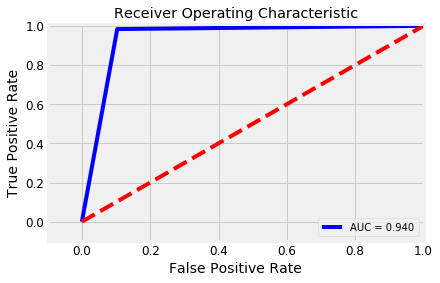

In [90]:
# y_pred_sample_score = tmp.decision_function(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<p> From the above diagram AUC = 1, which states that model has ideal measure of seperability. it is perfectly able to distinguish between the Account Lost(0) and Accounts Won(1)</p>

In [91]:
T_F = pd.DataFrame(y_test)
T_F['isWon_LoG_Reg_After_Prediction'] = pd.DataFrame(y_pred)
T_F = T_F.rename(columns = {0:"isWon_before_Prediction"})

In [92]:
T_F

,isWon_before_Prediction,isWon_LoG_Reg_After_Prediction
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


<h1> Loading the model on the Active Items

In [130]:
print(data.columns)

Index(['CycleStartDateKey', 'CycleStartDate', 'CycleStartYear',
       'CycleStartQuarter', 'CycleStartYearQuarter', 'CycleStartYearMonth',
       'CycleStartYearMonthName', 'CycleStartMonthName',
       'CycleStartMonthNameLong', 'CycleStartYearWeek', 'CycleStartDayName',
       'LeadID', 'LeadCycleHasCampaignSource', 'CampaignName', 'CampaignType',
       'CampaignGroup', 'CampaignDescription', 'CampaignStatus',
       'LeadCycleCampaignDate', 'LeadParentID', 'InitialCreatedDate',
       'InitialCreatedByDepartment', 'InitialCreatedByTitle',
       'InitialLeadSource', 'InitialRecordType', 'CyclePhase', 'CycleSequence',
       'CycleLeadSource', 'LeadSourceGroup', 'LeadSourceType', 'isCrossSell',
       'CycleOwnerTitle', 'DepartmentInitiatingSalesCycle', 'CycleEndDate',
       'CycleOwnerAssignedDate', 'AcctsOpened', 'isWon', 'FeesAssessed',
       'FeesNotInvoiced', 'FeesPaid', 'FeesUnpaid', 'FeesWrittenOff',
       'LeadScore', 'LeadGrade', 'YearCycleSequece', 'LeadsEngaged',
    

In [316]:
Final = data[['CycleStartDate','CycleStartMonthNameLong','CycleStartYearWeek','CycleStartDayName','CycleEndDate'
                   ,'LeadCycleHasCampaignSource', 'LeadSourceType', 'InitialRecordType','CyclePhase',
                   'LeadSourceGroup', 'CycleOwnerTitle', 'DepartmentInitiatingSalesCycle','isCrossSell','LeadScore',
                   'date_diff','CycleSequence','LeadsQualified','LeadsEngaged','LeadsPromoted','isWon','CycleOwnerTitle',
                    'DepartmentInitiatingSalesCycle']]
				   
				   

# Final = Final.sort_values(['CycleStartDate'], axis =0, ascending = False)	
Final = Final[Final['InitialRecordType'].notnull()]	

		   
from sklearn import preprocessing
## Applied ONE HOT ENCODING for "LeadGrade, LeadSourceGroup, LeadSoruceType"
Onehot = Final
# Onehot.columns
# OHE = Onehot.select_dtypes(include=[object])
OHE = Onehot[['InitialRecordType','LeadSourceGroup', 'LeadCycleHasCampaignSource','CyclePhase','CycleOwnerTitle',
              'DepartmentInitiatingSalesCycle']]
le = preprocessing.LabelEncoder()
X_2 = OHE.apply(le.fit_transform)
X_2.head()
enc = preprocessing.OneHotEncoder()
enc.fit(X_2)
LI_LG_LSG_LST2 = enc.transform(X_2)

LI_LG_LSG_LST2.dtype

print("Shape of OHE:", LI_LG_LSG_LST2.shape)
# print(LI_LG_LSG_LST2.dtype)	


### Reshaping other columns  "date_diff, CycleSequence, AcctsOpened, LeadsQualified, LeadsEngaged, LeadsPromoted"
# date_diff = Final['date_diff'].values.reshape(-1,1)
LeadsQualified = Final['LeadsQualified'].values.reshape(-1,1)
LeadsEngaged = Final['LeadsEngaged'].values.reshape(-1,1)
LeadsPromoted = Final['LeadsPromoted'].values.reshape(-1,1)
isCrossSell = Final['isCrossSell'].values.reshape(-1,1)
isWon = Final['isWon'].values.reshape(-1,1)

# Independent Variables (X_Train)
LI_LG_LSG_LST2_TR = LI_LG_LSG_LST2[np.where(Final['CycleEndDate'].dt.year!=2099)]
# date_diff_TR = date_diff[np.where(Final['CycleEndDate'].dt.year!=2099)]
LeadsQualified_TR = LeadsQualified[np.where(Final['CycleEndDate'].dt.year!=2099)]
LeadsEngaged_TR = LeadsEngaged[np.where(Final['CycleEndDate'].dt.year!=2099)]
LeadsPromoted_TR = LeadsPromoted[np.where(Final['CycleEndDate'].dt.year!=2099)]
isCrossSell_TR = isCrossSell[np.where(Final['CycleEndDate'].dt.year!=2099)]
# Dependent Variables (Y_Train)
isWon_TR = isWon[np.where(Final['CycleEndDate'].dt.year!=2099)]



# Independent Variables (X_Test)
LI_LG_LSG_LST2_TE = LI_LG_LSG_LST2[np.where(Final['CycleEndDate'].dt.year==2099)]
# date_diff_TE = date_diff[np.where(Final['CycleEndDate'].dt.year==2099)]
LeadsQualified_TE = LeadsQualified[np.where(Final['CycleEndDate'].dt.year==2099)]
LeadsEngaged_TE = LeadsEngaged[np.where(Final['CycleEndDate'].dt.year==2099)]
LeadsPromoted_TE = LeadsPromoted[np.where(Final['CycleEndDate'].dt.year==2099)]
isCrossSell_TE = isCrossSell[np.where(Final['CycleEndDate'].dt.year==2099)]
# Dependent Variables (Y_Test)
isWon_TE = isWon[np.where(Final['CycleEndDate'].dt.year==2099)]

from scipy.sparse import hstack
Train_X = hstack((LI_LG_LSG_LST2_TR,  LeadsQualified_TR, LeadsEngaged_TR, LeadsPromoted_TR, isCrossSell_TR))
Train_Y =  isWon_TR
Test_X = hstack((LI_LG_LSG_LST2_TE,  LeadsQualified_TE, LeadsEngaged_TE, LeadsPromoted_TE, isCrossSell_TE))
Test_Y = isWon_TE



print(Train_X.shape, Train_Y.shape)
print(Test_X.shape, Test_Y.shape)



Shape of OHE: (106208, 95)
(97325, 99) (97325, 1)
(8883, 99) (8883, 1)


In [317]:

os = SMOTE(random_state=27)
X_train, X_test, y_train, y_test = train_test_split(Train_X, Train_Y, test_size=0.3, random_state=27)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

print(os_data_X.shape)
print(os_data_y.shape)

(116486, 99)
(116486,)


In [318]:
# #Hyperparameter Tuning for Logistic Regression

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# parameters = {
#     'C': np.linspace(1, 10, 10)
#              }
# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
# clf.fit(os_data_X, os_data_y)

# print(clf.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   10.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   46.1s finished


{'C': 1.0}


In [319]:
# lr1 = LogisticRegression(C=1,penalty='l1', verbose=5)
# lr1.fit(os_data_X, os_data_y)

[LibLinear]

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=5,
                   warm_start=False)

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=5,
                   warm_start=False)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

actual = Test_Y

[LibLinear]

In [351]:
def main():
    X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
    logreg = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=100,
                       multi_class='warn', n_jobs=None, penalty='l1',
                       random_state=None, solver='warn', tol=0.0001, verbose=5,
                       warm_start=False)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
if __name__ == '__main__':
    main()

[LibLinear]

In [352]:
print(X_train.shape, y_train.shape, y_pred.shape)
print(Test_X.shape)
print(actual.shape)

(81540, 99) (81540,) (34946,)
(8883, 99)
(8883, 1)


In [353]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


10 Fold Cross Validation of Accuracy 

In [323]:
import datetime
from sklearn.model_selection import *
from sklearn.model_selection import KFold, train_test_split, GridSearchCV


start_time  = datetime.datetime.now()


kf = 10

for i in range(kf):
    X_tr, X_cv, y_tr, y_cv = train_test_split(os_data_X, os_data_y, test_size = 0.3)

    LR = LogisticRegression()
    LR.fit(X_train, y_train)

    pred = LR.predict(X_cv)
    print(LR.score(X_cv, y_cv))
    
end_time = datetime.datetime.now()
print ('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))

0.9316087678131975
0.9333257025124477
0.9311223029817433
0.9322955416928976
0.9329536999942769
0.9294339838608138
0.9326961597893894
0.9312939964516683
0.9302352200537973
0.9319807703313684
Training Done..., Time Cost: 11


In [324]:

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))
# # print(y_pred)

In [350]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[15064  2395]
 [   58 17429]]


In [333]:
T_F2 = pd.DataFrame(Test_Y)
T_F2['isWon_LoG_Reg_After_Prediction'] = pd.DataFrame(y_pred)
T_F2 = T_F2.rename(columns = {0:"isWon_before_Prediction"})

per = T_F2['isWon_LoG_Reg_After_Prediction'].value_counts()/ len(T_F2)


Checking the predictions on the Active Accounts

In [257]:
logreg = LogisticRegression()
logreg.fit(Train_X, Train_Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
y_pred = logreg.predict(Test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Test_X, Test_Y)))

Accuracy of logistic regression classifier on test set: 0.90


In [259]:
T_F = pd.DataFrame(Test_Y)
T_F['isWon_LoG_Reg_After_Prediction'] = pd.DataFrame(y_pred)
T_F = T_F.rename(columns = {0:"isWon_before_Prediction"})
print(T_F['isWon_before_Prediction'].value_counts())

0    8883
Name: isWon_before_Prediction, dtype: int64


In [260]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Test_Y, y_pred)

print(confusion_matrix)

[[7972  911]
 [   0    0]]


In [261]:

# # os = SMOTE(random_state=27)
# # X_train, X_test, y_train, y_test = train_test_split(Train_X, Train_Y, test_size=0.3, random_state=27)
# # os_data_X,os_data_y=os.fit_sample(X_train, y_train)

# # print(os_data_X.shape)
# # print(os_data_y.shape)


# # from sklearn.linear_model import LogisticRegression
# # from sklearn import metrics

# # X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
# logreg = LogisticRegression()
# logreg.fit(Train_X, Train_Y)


# # y_pred = logreg.predict(X_test)
# # print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [97]:
!python --version

Python 3.6.4 :: Anaconda, Inc.
